In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pickle
%matplotlib inline


In [5]:
df=  pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142193.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2.360682
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,371.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64

In [10]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RISK_MM           681
RainTomorrow        2
dtype: int64

In [11]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [12]:
### List comprehension to seperate the continous, descreet
num_var= [feature for feature in df.columns if df[feature].dtypes != 'object']
discret_var= [feature for feature in num_var if len(df[feature].unique())<= 25]
cont_var= [feature for feature in num_var if feature not in discret_var]
categ_var= [feature for feature in df.columns if feature not in num_var]

In [13]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64

In [14]:
### To get the percentage of null
df.isnull().sum()* 100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RISK_MM           2.245978
RainTomorrow      2.245978
dtype: float64

In [15]:
### To know if a column is categorical or not contimous or discreet
def find_var_type(var):
    if var in discret_var:
        print('{} is numerical variable, discret in nature'.format(var))
    elif var in cont_var:
        print('{} is continuous variable'.format(var))
    else:
        print('{} is categorical variable'.format(var))

In [16]:
find_var_type('Rainfall')

Rainfall is continuous variable


In [17]:
### To fill our missing space randomly

def RandomImputation(df, feature):
    df[feature]= df[feature]
    random_sample= df[feature].dropna().sample(df[feature].isnull().sum(), random_state= 0)
    random_sample.index= df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature]= random_sample

In [18]:
## The one with continous variable should be filled woth their mean 
## And the one with categorical will be filled with the randomimutation
RandomImputation(df, 'Cloud9am')
RandomImputation(df, 'Cloud3pm')
RandomImputation(df, 'Evaporation')
RandomImputation(df, 'Sunshine')

In [19]:
### To fill the continous
def MeanImputation(df, feature):
    df[feature]= df[feature]
    mean= df[feature].mean()
    df[feature]= df[feature].fillna(mean)

In [20]:
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'Pressure3pm')
MeanImputation(df, 'MaxTemp')
MeanImputation(df, 'MinTemp')
MeanImputation(df, 'Rainfall')
MeanImputation(df, 'WindGustSpeed')
MeanImputation(df, 'WindSpeed9am')
MeanImputation(df, 'WindSpeed3pm')
MeanImputation(df, 'Humidity9am')
MeanImputation(df, 'Humidity3pm')
MeanImputation(df, 'Temp9am')
MeanImputation(df, 'Temp3pm')

In [21]:
### To fill the categorical column
df['RainToday']= pd.get_dummies(df['RainToday'], drop_first= True)
df['RainTomorrow']= pd.get_dummies(df['RainTomorrow'], drop_first= True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,2.4,8.3,W,44.00000,W,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,0.0,False
1,2008-12-02,Albury,7.4,25.100000,0.0,3.6,10.0,WNW,44.00000,NNW,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,0.0,False
2,2008-12-03,Albury,12.9,25.700000,0.0,2.6,4.4,WSW,46.00000,W,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,0.0,False
3,2008-12-04,Albury,9.2,28.000000,0.0,18.4,8.9,NE,24.00000,SE,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,1.0,False
4,2008-12-05,Albury,17.5,32.300000,1.0,5.4,3.0,W,41.00000,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,0.2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,1.4,7.8,E,31.00000,SE,...,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,0.0,False
145456,2017-06-22,Uluru,3.6,25.300000,0.0,7.6,13.5,NNW,22.00000,SE,...,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,0.0,False
145457,2017-06-23,Uluru,5.4,26.900000,0.0,6.8,11.0,N,37.00000,SE,...,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,0.0,False
145458,2017-06-24,Uluru,7.8,27.000000,0.0,2.6,13.2,SE,28.00000,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,0.0,False


In [22]:
### To categorise our feature
for feature in categ_var:
    print(feature, (df.groupby([feature])['RainTomorrow'].mean().sort_values(ascending= False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [23]:
WindGustDir= {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
    
WindDir9am= {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}

WindDir3pm= {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}

In [24]:
df['WindGustDir']= df['WindGustDir'].map(WindGustDir)
df['WindDir9am']= df['WindDir9am'].map(WindDir9am)
df['WindDir3pm']= df['WindDir3pm'].map(WindDir3pm)

In [25]:
### To check the amount of position to fill
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RISK_MM          2.245978
RainTomorrow     0.000000
dtype: float64

In [26]:
### We want to determine the most effective wind
### If we use ine hot encoder it wont arrange the effectiveness of the wind with their hierachy i.e base on their importance
### The most effective one brought 1 as the result
df['WindGustDir']= df['WindGustDir'].fillna(df['WindGustDir'].value_counts().index[0])
df['WindDir9am']= df['WindDir9am'].fillna(df['WindDir9am'].value_counts().index[0])
df['WindDir3pm']= df['WindDir3pm'].fillna(df['WindDir3pm'].value_counts().index[0])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,2.4,8.3,4.0,44.00000,5.0,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,0.0,False
1,2008-12-02,Albury,7.4,25.100000,0.0,3.6,10.0,2.0,44.00000,0.0,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,0.0,False
2,2008-12-03,Albury,12.9,25.700000,0.0,2.6,4.4,5.0,46.00000,5.0,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,0.0,False
3,2008-12-04,Albury,9.2,28.000000,0.0,18.4,8.9,11.0,24.00000,13.0,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,1.0,False
4,2008-12-05,Albury,17.5,32.300000,1.0,5.4,3.0,4.0,41.00000,12.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,0.2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,1.4,7.8,15.0,31.00000,13.0,...,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,0.0,False
145456,2017-06-22,Uluru,3.6,25.300000,0.0,7.6,13.5,0.0,22.00000,13.0,...,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,0.0,False
145457,2017-06-23,Uluru,5.4,26.900000,0.0,6.8,11.0,3.0,37.00000,13.0,...,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,0.0,False
145458,2017-06-24,Uluru,7.8,27.000000,0.0,2.6,13.2,12.0,28.00000,11.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,0.0,False


In [27]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      0.000000
WindGustSpeed    0.000000
WindDir9am       0.000000
WindDir3pm       0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RISK_MM          2.245978
RainTomorrow     0.000000
dtype: float64

In [28]:
### WE want to use one hot encoder for the location
### Unstacking is to determine thr probability where is goin to be heavily rained to non heavily rained
df_2= df.groupby(['Location'])['RainTomorrow'].value_counts().sort_values().unstack()
df_2

RainTomorrow,False,True
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [29]:
# It will pick only the column with area of high probability of rainfall
df_2.iloc[:, 1].sort_values(ascending=False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [30]:
### Assignn each location withb the value of their probability
map_location= {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
map_location    

{'Portland': 1,
 'Cairns': 2,
 'Walpole': 3,
 'Dartmoor': 4,
 'MountGambier': 5,
 'NorfolkIsland': 6,
 'Albany': 7,
 'Witchcliffe': 8,
 'CoffsHarbour': 9,
 'Sydney': 10,
 'Darwin': 11,
 'MountGinini': 12,
 'NorahHead': 13,
 'Ballarat': 14,
 'GoldCoast': 15,
 'SydneyAirport': 16,
 'Hobart': 17,
 'Watsonia': 18,
 'Newcastle': 19,
 'Wollongong': 20,
 'Brisbane': 21,
 'Williamtown': 22,
 'Launceston': 23,
 'Adelaide': 24,
 'MelbourneAirport': 25,
 'Perth': 26,
 'Sale': 27,
 'Melbourne': 28,
 'Canberra': 29,
 'Albury': 30,
 'Penrith': 31,
 'Nuriootpa': 32,
 'BadgerysCreek': 33,
 'Tuggeranong': 34,
 'PerthAirport': 35,
 'Bendigo': 36,
 'Richmond': 37,
 'WaggaWagga': 38,
 'Townsville': 39,
 'PearceRAAF': 40,
 'SalmonGums': 41,
 'Moree': 42,
 'Cobar': 43,
 'Mildura': 44,
 'Katherine': 45,
 'AliceSprings': 46,
 'Nhil': 47,
 'Woomera': 48,
 'Uluru': 49}

In [31]:
### To fill each location to their required position
df['Location']=df['Location'].map(map_location)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,30,13.4,22.900000,0.6,2.4,8.3,4.0,44.00000,5.0,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,0.0,False
1,2008-12-02,30,7.4,25.100000,0.0,3.6,10.0,2.0,44.00000,0.0,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,0.0,False
2,2008-12-03,30,12.9,25.700000,0.0,2.6,4.4,5.0,46.00000,5.0,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,0.0,False
3,2008-12-04,30,9.2,28.000000,0.0,18.4,8.9,11.0,24.00000,13.0,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,1.0,False
4,2008-12-05,30,17.5,32.300000,1.0,5.4,3.0,4.0,41.00000,12.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,0.2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,49,2.8,23.400000,0.0,1.4,7.8,15.0,31.00000,13.0,...,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,0.0,False
145456,2017-06-22,49,3.6,25.300000,0.0,7.6,13.5,0.0,22.00000,13.0,...,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,0.0,False
145457,2017-06-23,49,5.4,26.900000,0.0,6.8,11.0,3.0,37.00000,13.0,...,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,0.0,False
145458,2017-06-24,49,7.8,27.000000,0.0,2.6,13.2,12.0,28.00000,11.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,0.0,False


In [32]:
from datetime import datetime

In [33]:
print(df['Date'].head())

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object


In [34]:
print(df['Date'].tail())

145455    2017-06-21
145456    2017-06-22
145457    2017-06-23
145458    2017-06-24
145459    2017-06-25
Name: Date, dtype: object


In [35]:
print(df['Date'].unique()) 

['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']


In [36]:
### The first method to split date and time has been used earlier, convert the date time to an integers
### Here is another Another methid to split the date
df['Date']=pd.to_datetime(df['Date'],format= '%Y-%m-%d',errors='coerce')
df['month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day
df['Year']=df['Date'].dt.year

In [37]:
df= df.drop(['Date'], axis= 1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,month,Day,Year
0,30,13.4,22.900000,0.6,2.4,8.3,4.0,44.00000,5.0,3.0,...,8.0,0.0,16.9,21.8,False,0.0,False,12,1,2008
1,30,7.4,25.100000,0.0,3.6,10.0,2.0,44.00000,0.0,6.0,...,7.0,1.0,17.2,24.3,False,0.0,False,12,2,2008
2,30,12.9,25.700000,0.0,2.6,4.4,5.0,46.00000,5.0,6.0,...,8.0,2.0,21.0,23.2,False,0.0,False,12,3,2008
3,30,9.2,28.000000,0.0,18.4,8.9,11.0,24.00000,13.0,14.0,...,0.0,5.0,18.1,26.5,False,1.0,False,12,4,2008
4,30,17.5,32.300000,1.0,5.4,3.0,4.0,41.00000,12.0,0.0,...,7.0,8.0,17.8,29.7,False,0.2,False,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.400000,0.0,1.4,7.8,15.0,31.00000,13.0,13.0,...,1.0,1.0,10.1,22.4,False,0.0,False,6,21,2017
145456,49,3.6,25.300000,0.0,7.6,13.5,0.0,22.00000,13.0,2.0,...,8.0,5.0,10.9,24.5,False,0.0,False,6,22,2017
145457,49,5.4,26.900000,0.0,6.8,11.0,3.0,37.00000,13.0,3.0,...,8.0,1.0,12.5,26.1,False,0.0,False,6,23,2017
145458,49,7.8,27.000000,0.0,2.6,13.2,12.0,28.00000,11.0,2.0,...,3.0,2.0,15.1,26.0,False,0.0,False,6,24,2017


In [38]:
### subplot is use to plot two plot beside each other
import scipy.stats as stats
import pylab

def plot_curve(df, feature):
    plt.figure(figsize= (10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist= 'norm', plot= pylab)
    plt.title(feature)
    plt.show()

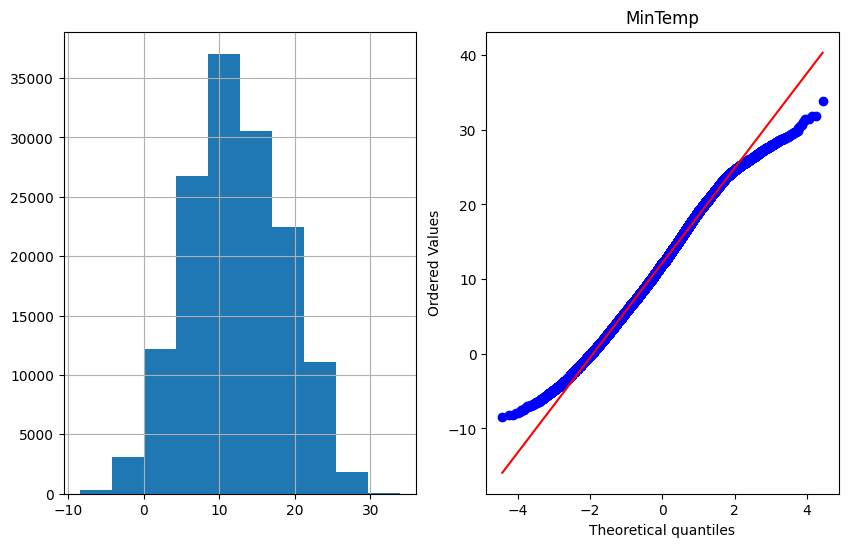

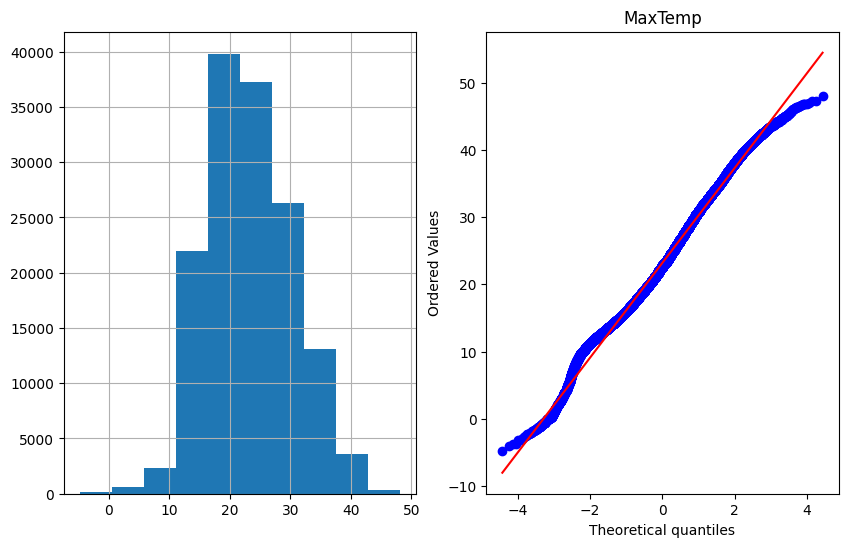

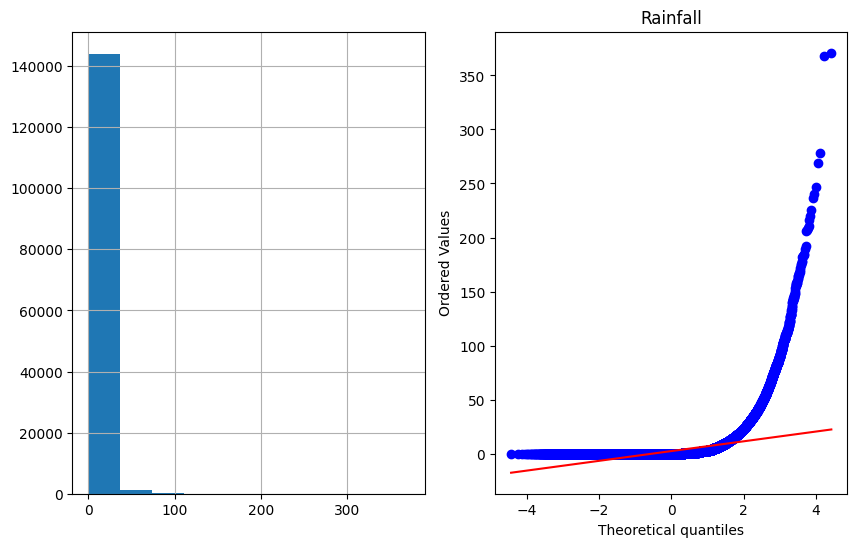

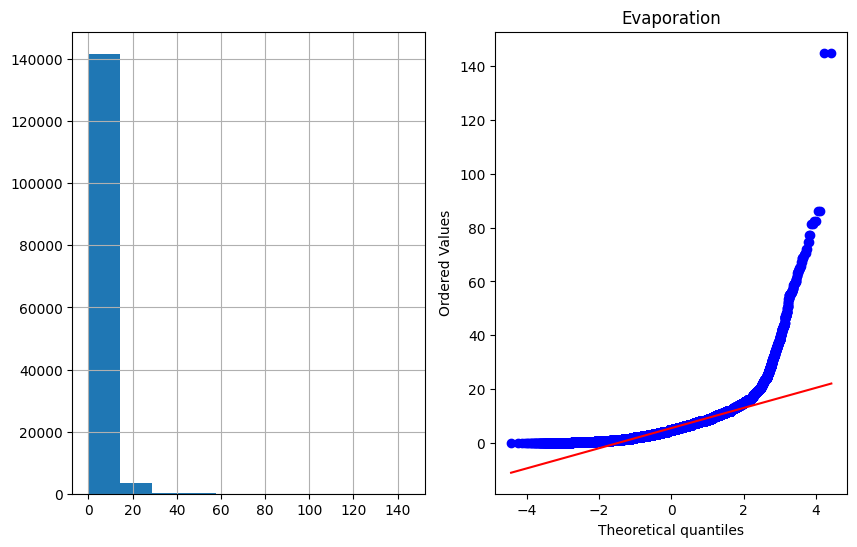

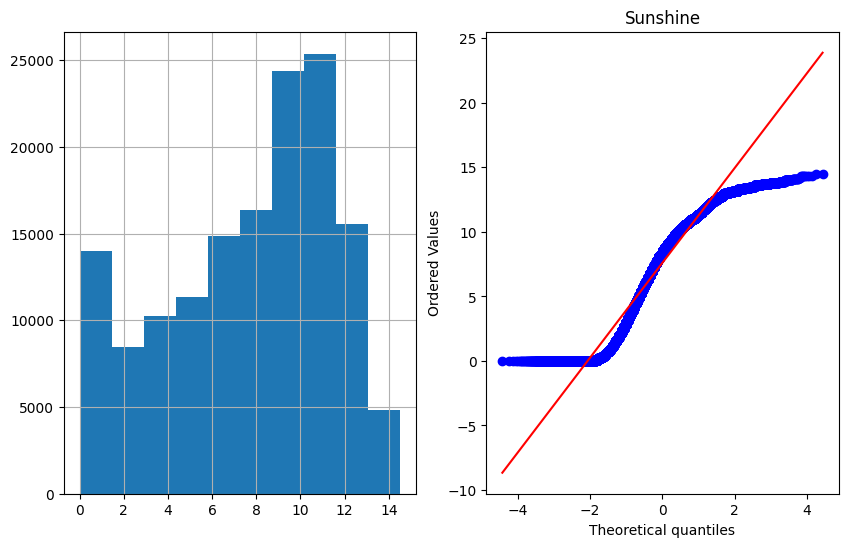

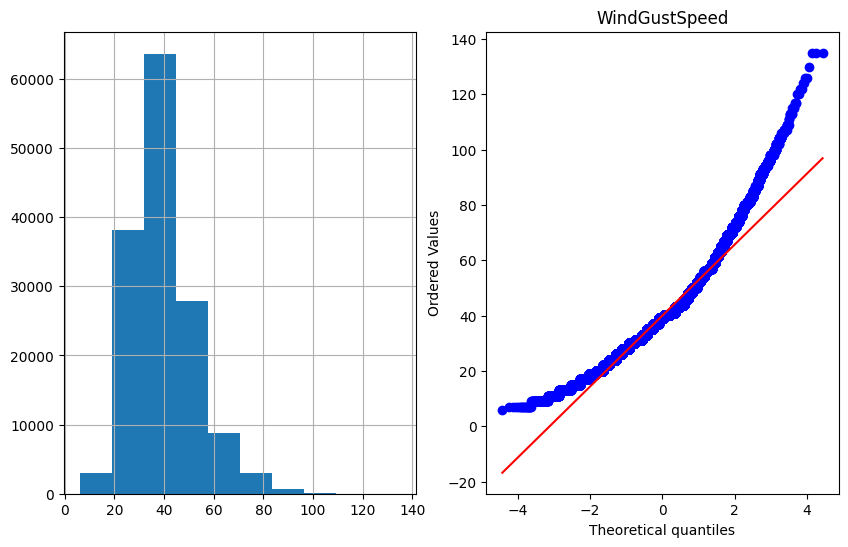

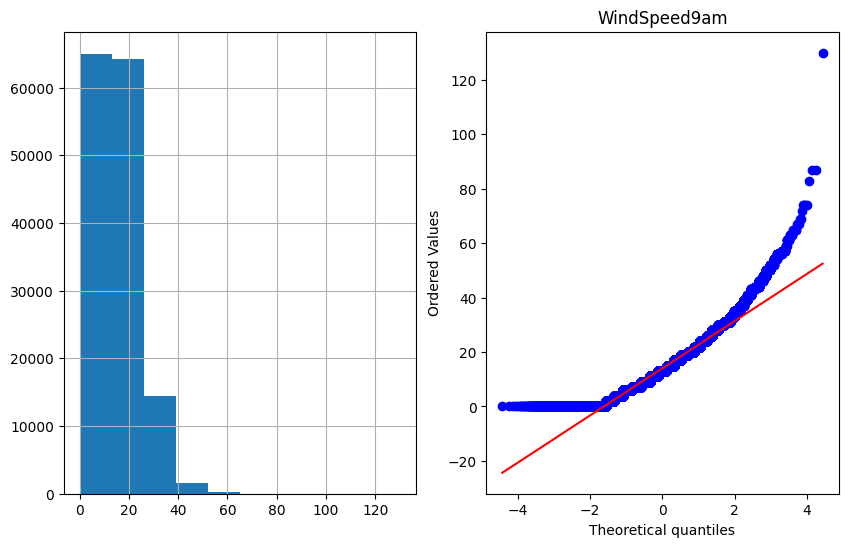

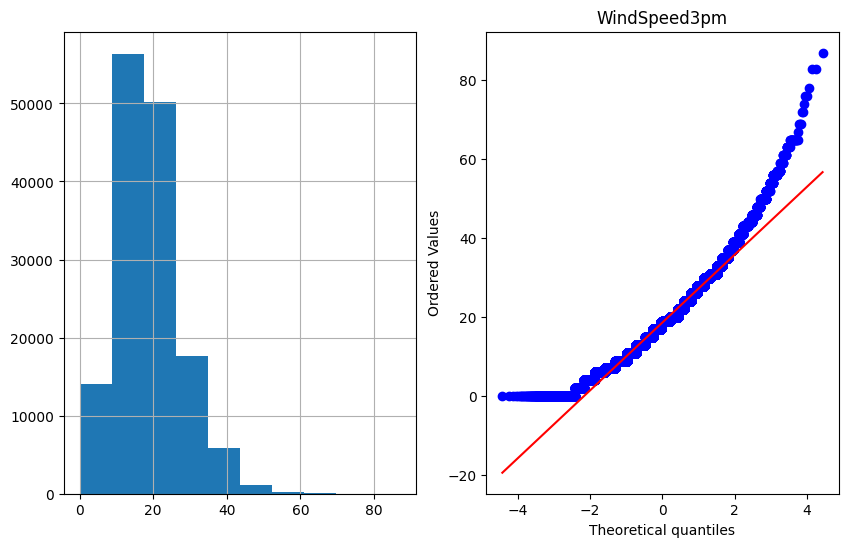

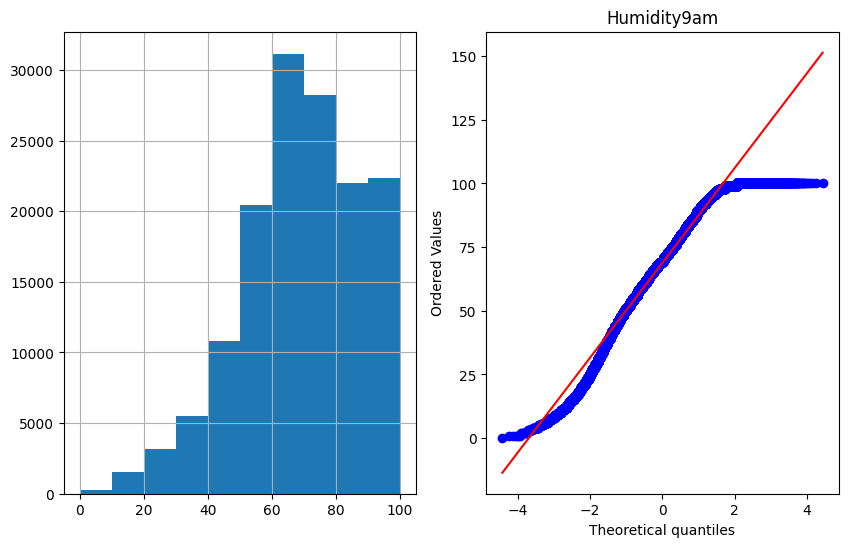

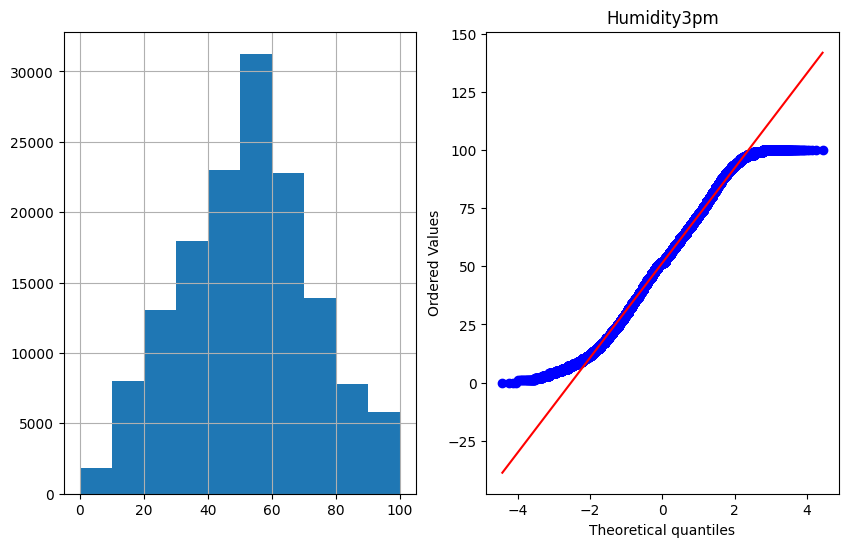

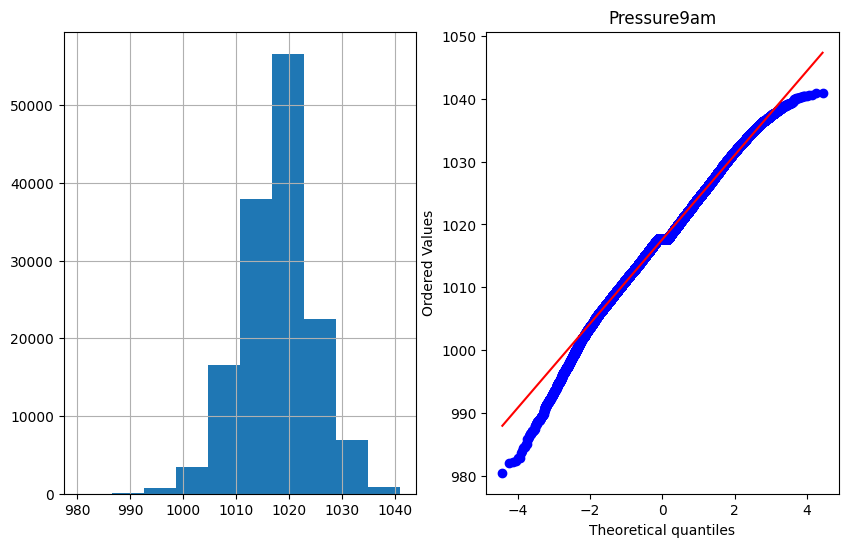

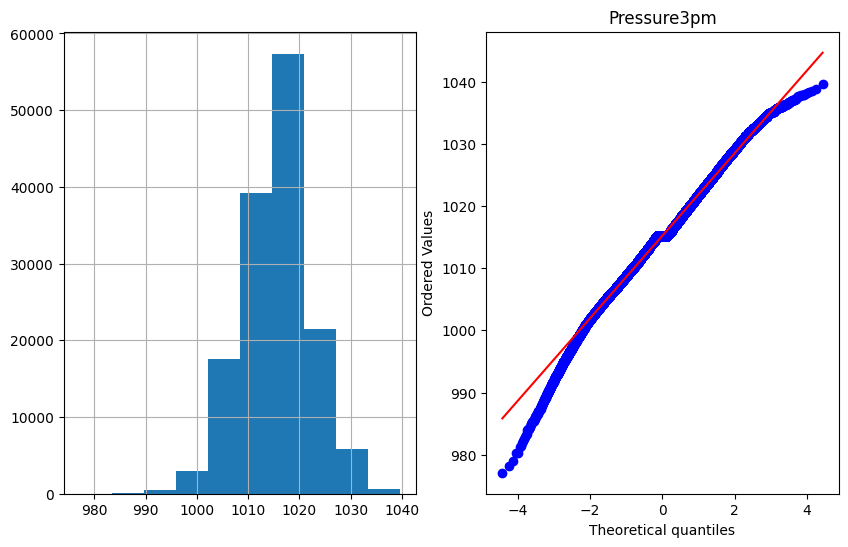

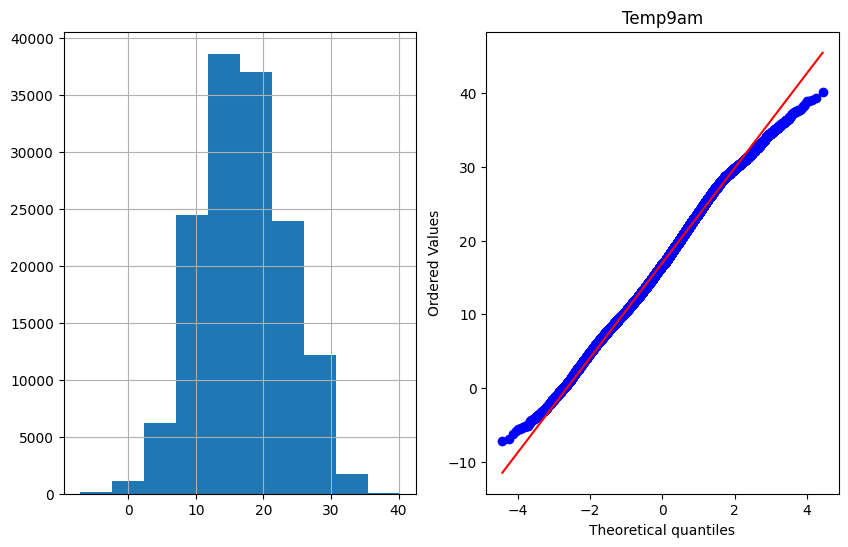

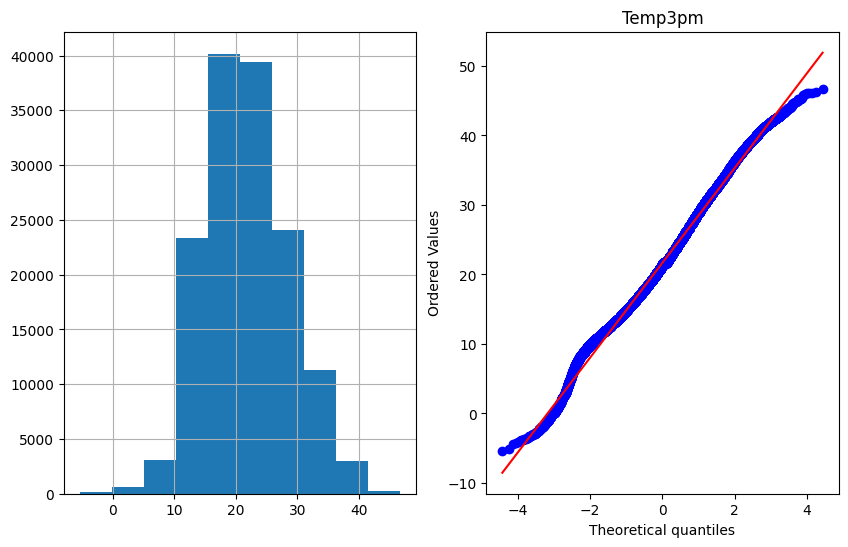

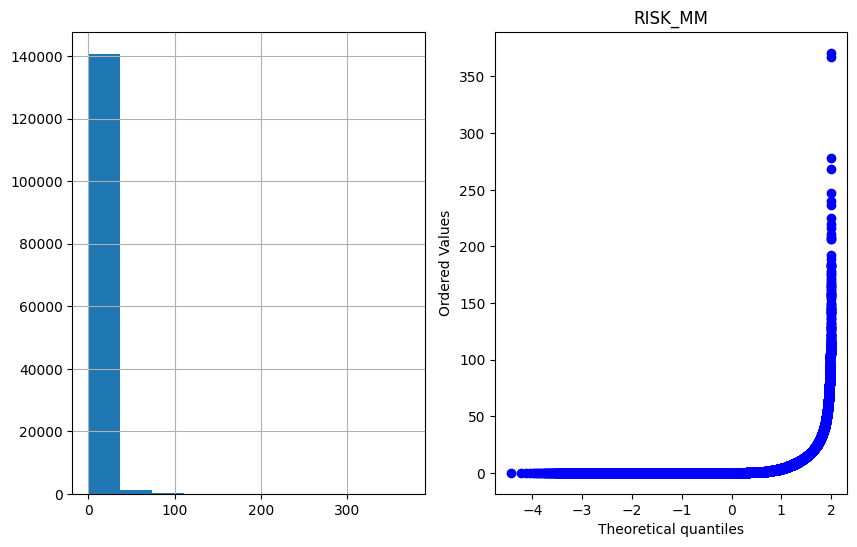

In [39]:
for i in cont_var:
    plot_curve(df,i)

In [40]:
x=df.drop(['RISK_MM', 'RainTomorrow'], axis= 1)
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month,Day,Year
0,30,13.4,22.900000,0.6,2.4,8.3,4.0,44.00000,5.0,3.0,...,1007.7,1007.1,8.0,0.0,16.9,21.8,False,12,1,2008
1,30,7.4,25.100000,0.0,3.6,10.0,2.0,44.00000,0.0,6.0,...,1010.6,1007.8,7.0,1.0,17.2,24.3,False,12,2,2008
2,30,12.9,25.700000,0.0,2.6,4.4,5.0,46.00000,5.0,6.0,...,1007.6,1008.7,8.0,2.0,21.0,23.2,False,12,3,2008
3,30,9.2,28.000000,0.0,18.4,8.9,11.0,24.00000,13.0,14.0,...,1017.6,1012.8,0.0,5.0,18.1,26.5,False,12,4,2008
4,30,17.5,32.300000,1.0,5.4,3.0,4.0,41.00000,12.0,0.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,False,12,5,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.400000,0.0,1.4,7.8,15.0,31.00000,13.0,13.0,...,1024.6,1020.3,1.0,1.0,10.1,22.4,False,6,21,2017
145456,49,3.6,25.300000,0.0,7.6,13.5,0.0,22.00000,13.0,2.0,...,1023.5,1019.1,8.0,5.0,10.9,24.5,False,6,22,2017
145457,49,5.4,26.900000,0.0,6.8,11.0,3.0,37.00000,13.0,3.0,...,1021.0,1016.8,8.0,1.0,12.5,26.1,False,6,23,2017
145458,49,7.8,27.000000,0.0,2.6,13.2,12.0,28.00000,11.0,2.0,...,1019.4,1016.5,3.0,2.0,15.1,26.0,False,6,24,2017


In [41]:
### Standadrd scaler makes the data to fall between -1 and 1 while minmax makes it to be 0 and 1
import sklearn
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(x)
scaled= scaler.transform(x)
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)


In [42]:
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


In [43]:
X= pd.DataFrame(scaled, columns= x.columns)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month,Day,Year
0,0.415017,0.189447,-4.533631e-02,-0.210072,-0.727927,0.182347,-0.740424,0.302234,-0.406066,-1.024910,...,-1.478788,-1.223882,1.230562,-1.657694,-0.014053,0.017023,-0.529795,1.634076,-1.672844,-1.879575
1,0.415017,-0.753101,2.650431e-01,-0.281650,-0.442930,0.631373,-1.187566,0.302234,-1.439618,-0.357114,...,-1.047782,-1.118839,0.884261,-1.289981,0.032464,0.381985,-0.529795,1.634076,-1.559140,-1.879575
2,0.415017,0.110901,3.496920e-01,-0.281650,-0.680427,-0.847773,-0.516853,0.454694,-0.406066,-0.357114,...,-1.493650,-0.983784,1.230562,-0.922267,0.621685,0.221402,-0.529795,1.634076,-1.445436,-1.879575
3,0.415017,-0.470337,6.741796e-01,-0.281650,3.072032,0.340827,0.824574,-1.222364,1.247616,1.423675,...,-0.007422,-0.368534,-1.539848,0.180874,0.172017,0.703151,-0.529795,1.634076,-1.331732,-1.879575
4,0.415017,0.833521,1.280830e+00,-0.162353,-0.015435,-1.217559,-0.740424,0.073544,1.040905,-1.692706,...,-1.018057,-1.388949,0.884261,1.284015,0.125499,1.170302,-0.529795,1.634076,-1.218028,-1.879575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.795931,-1.475720,2.520446e-02,-0.281650,-0.965424,0.050280,1.718858,-0.688755,1.247616,1.201076,...,1.032937,0.756925,-1.193546,-1.289981,-1.068448,0.104614,-0.529795,-0.116599,0.601238,1.666978
145456,1.795931,-1.350047,2.932594e-01,-0.281650,0.507060,1.555839,-1.634708,-1.374824,1.247616,-1.247509,...,0.869452,0.576852,1.230562,0.180874,-0.944401,0.411182,-0.529795,-0.116599,0.714942,1.666978
145457,1.795931,-1.067283,5.189899e-01,-0.281650,0.317062,0.895506,-0.963995,-0.231375,1.247616,-1.024910,...,0.497895,0.231711,1.230562,-1.289981,-0.696308,0.644757,-0.529795,-0.116599,0.828646,1.666978
145458,1.795931,-0.690264,5.330980e-01,-0.281650,-0.680427,1.476599,1.048145,-0.917445,0.834195,-1.247509,...,0.260099,0.186693,-0.500944,-0.922267,-0.293158,0.630159,-0.529795,-0.116599,0.942350,1.666978


In [44]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'month', 'Day', 'Year'],
      dtype='object')

In [45]:
y= df['RainTomorrow']
y

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459    False
Name: RainTomorrow, Length: 145460, dtype: bool

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test= train_test_split(X,y, random_state= 101, test_size= 0.2)

In [47]:
# Creating the model using Random Forest
from sklearn.ensemble import RandomForestClassifier
rdf= RandomForestClassifier()
rdf.fit(x_train, y_train)
print(f'Accuracy= {rdf.score(x_test, y_test)*100}%')

Accuracy= 85.43585865530042%


In [48]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train, y_train)
score= lr.score(x_test, y_test)
print(score)

0.8407122232916265


In [49]:
pre= rdf.predict(x_test)
pre

array([False,  True, False, ..., False, False, False], shape=(29092,))

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
cfr= classification_report(pre, y_test)

print(cfr)

              precision    recall  f1-score   support

       False       0.96      0.87      0.91     25013
        True       0.49      0.77      0.60      4079

    accuracy                           0.85     29092
   macro avg       0.72      0.82      0.75     29092
weighted avg       0.89      0.85      0.87     29092



In [51]:
import pickle as pkl
import gzip

In [54]:
with gzip.open('model.pkl.gz', 'wb') as f:
    pickle.dump(rdf, f)

In [53]:
# with open('model.pkl', 'wb') as f:
#     pkl.dump(rdf,f)